## Python数据结构list相关方法性能测试
相关方法对应时间复杂度如下:

操作| 大O表示法
------------ | -------------
index | O(n)
index assignment item | O(1)
append | O(1)
pop | O(1)
pop(i) | O(n)
insert(i, item) | O(n)
del operator | O(n)
iteration | O(n)
contains(in) | O(n)
get slice[x:y] | O(k)
del slice | O(n)
set slice | O(n+k)
reverse | O(n))
concatenate | O(k)
sort | O(nlog n)
multiply | O(nk)

### 探究四种不同的方法来生成从 0 到 n 的列表的测试

In [63]:
# 串联运算符是 O(k),这里k是指正在被连接的列表的大小
def test1():
    l = []
    for i in range(1000):
        l = l + [i]

# "append"操作是 O(1)
def test2():
    l = []
    for i in range(1000):
        l.append(i)
        
# 列表生成式    
def test3():
    l = [i for i in range(1000)]
    
# range()函数
def test4():
    l = list(range(1000))



为了获取我们程序运行所需要的时间，我们需要引用 Python 中的 timeit 模块。这个 timeit 模块
是被设计成在一个持续稳定的环境中，尽可能使用与计算机操作系统相似的计时机制，让 Python 的
开发者实现跨平台运行时间的测量

为使用 timeit 模块，你需要创建一个 Timer 对象，这个对象的参数是两个 Python 语句。

第一个参数是你想进行计时的 Python 语句；第二个参数是建立这次测试你将要运行的语句。
timeit模块就将测量运行这个语句一定次数多花费的时间。

如果不加要求，timeit 模块的默认运行次数是一百万次。运行结束后，它将以浮点数的形式返回运行的总时间(单位：秒)。但是，由于它默认运行语
句一百万次，当你执行程序一次时，它返回的结果是以微秒为单位的。

你也可以在 timeit 中附上一个名叫 number 的参数，这样你就可以指定程序被执行的次数。下图将展示对我们的每一个程序执行
1000 次，分别需要花费的时间

In [32]:
from timeit import Timer
t1 = Timer("test1()", "from __main__ import test1")
print('concat耗时', t1.timeit(number=1000), '妙')

t2 = Timer("test2()", "from __main__ import test2")
print('append()耗时', t1.timeit(number=1000), '妙')

t3 = Timer("test3()", "from __main__ import test3")
print('列表生成式耗时', t1.timeit(number=1000), '妙')

t4 = Timer("test4()", "from __main__ import test4")
print('range()耗时', t1.timeit(number=1000), '妙')

concat耗时 1.2742081999999755 妙
append()耗时 1.293394299999818 妙
列表生成式耗时 1.2825788000000102 妙
range()耗时 1.3100748000001659 妙


发现不同的方法来生成列表消耗的时间差不多

### list.pop()的计时实验
- pop()时间复杂度为O(1),当 pop 操作每次从列表的最后一位删除元素时复杂度为 O(1)

- pop(i)时间复杂度为O(1),将列表的第一个元素或中间任意一个位置的元素删除时,复杂度则为 O(n)

在 Python 的执行过程中,当从列表的第一位删除一个元素,其后的每一位元素都将向前挪动一位

用 timeit 模块进行另一个实验,我们的目标是能够核实以下两种 pop 操作的表现:
    
    1.第一种是在一个已知长度的列表中从列表的末端删除元素
    2.第二种则是从这个列表的开头删除元素

In [62]:
x = list(range(1000000))
pop_end = Timer("x.pop()", "from __main__ import x")

x = list(range(1000000))
pop_zero = Timer("x.pop(0)", "from __main__ import x")


print('pop()操作,耗时:%f ' %pop_end.timeit(number=1000),'秒')
print('pop(0)操作,耗时:%f ' %pop_zero.timeit(number=1000),'秒')

pop()操作,耗时:0.000070  秒
pop(0)操作,耗时:0.675829  秒


从上述结果看,该测试证明了 pop(0)操作确实比 pop()操作要慢，但并不能确切的说明 pop(0)
复杂度为 O(n)而 pop()的复杂度为 O(1)。

为了证实这个结果，我们需要综合不同列表长度的测试结果

In [50]:
print("pop(0)        pop()")
for i in range(10000,1000001, 100000):
    x = list(range(i))
    pop_zero_time = pop_zero.timeit(number=1000)
    
    x = list(range(i))
    pop_end_time = pop_end.timeit(number=1000)
    print("%f  , %f" %(pop_zero_time,pop_end_time))
    

pop(0)        pop()
0.001706  , 0.000062
0.027875  , 0.000062
0.051570  , 0.000061
0.073112  , 0.000058
0.131977  , 0.000072
0.241515  , 0.000096
0.491032  , 0.000073
0.374883  , 0.000062
0.482017  , 0.000076
0.795399  , 0.000082


随着列表的逐渐变长，pop(0)所需要的时间也同样
增加。但是 pop() 的时间却始终保持基本不变。不出所料，这正是 O(n)与 O(1) 算法的行为

绘制图表来直观显示

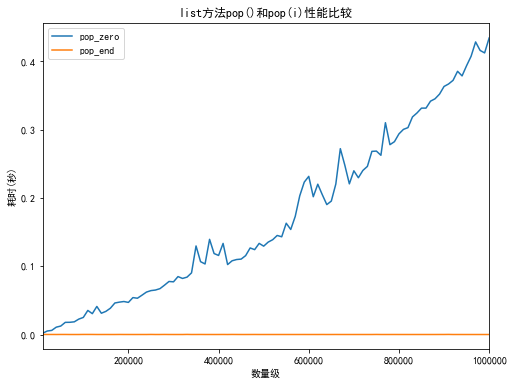

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
lst_pop_zero = []
lst_pop_end = []

# 间隔改为10000,结果更准确一些
for i in range(10000,1000001, 10000):
    x = list(range(i))
    lst_pop_zero.append(pop_zero.timeit(number=1000)) 
    
    x = list(range(i))
    lst_pop_end.append(pop_end.timeit(number=1000)) 

# 构造数据
data = {
    'pop_zero': lst_pop_zero,
    'pop_end': lst_pop_end
}

df = pd.DataFrame(data, index=range(10000,1000001, 10000), columns=['pop_zero','pop_end'])

# 开始绘图
fig = df.plot(figsize=(8,6))  # # 创建图表对象
plt.title('list方法pop()和pop(i)性能比较')  # 图名
plt.xlabel('数量级')  # x轴标签
plt.ylabel('耗时(秒)') # y轴标签
plt.legend(loc = 'best')  

plt.show()

pop(i)的时间复杂度为(n),因此其图走向大致是线性关系,出现一些"陡峭"的点,原因可能是:
- 自己电脑CPU调度分配问题,可能在某个时刻,资源更多的调度给其他程序..(目前本人电脑打开的程序挺多的)
- list.pop(i)算法本身设计在某个临界点会突然增加时间复杂度,然后再回落. 这就是算法的设计问题了,先不研究那么深了
